# Water Potability

## Introduction

An important aspect of life is access to safe drinking water. In many places around the world, people do not have easy access, or sometimes any access at all, to clean drinking water. According to the World Health Organization, "over 2 billion people live in water-stressed countries" and "use a drinking water source contaminated with faeces" (https://www.who.int/news-room/fact-sheets/detail/drinking-water). With such a pressing issue, the ability to identify Potable Water accurately and effectively is of utmost importance.

## Applications

Our group aims to use the chemical properties of water to identity whether the body of water is potable. Because these chemical properties can be identified using technology, a device could be constructed to automatically and periodically test a body of water and then use our model to determine whether the water is safe to drink. This device could track the potability of water and notify officials of a change in status, reducing the change of adverse health affects of unsafe drinking water.

## The Dataset

Our dataset contains properties of 3,276 different bodies of water. Each property is a metric of the quality of the water; however, no one property can be used in isolation. The potability of the body of water is determined by the combination of its many attributes.

**Link to Dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability**

### Description of Attributes

(These are modified from the descriptions from https://www.kaggle.com/datasets/adityakadiwal/water-potability)

**pH value**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.

**Hardness**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total Dissolved Solids - TDS)**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water.

**Chloramines**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water.

**Sulfate**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.

**Conductivity**

Pure water is not a good conductor of electric current rather it is a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity.

**Organic Carbon**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water.

**Trihalomethanes**

THMs are chemicals which may be found in water treated with chlorine.

**Turbidity**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.

# Data Cleaning

In [1]:
# Imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import imblearn as imb
import matplotlib.pyplot as plt
import time
%matplotlib inline

Load the dataset into a DataFrame to check status of data. Check
for missing values, outliers, errors, or anything else that stands
out.

In [2]:
# Load the data into a DataFrame
data = pd.read_csv('water_potability.csv')

data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Simply by looking at the head, we can see missing values. Because
each row is a separate body of water, we could impute the average
of the column. However, we may need to simply remove the whole row
depending on how many NaN values are contained in the data.

In [3]:
# Count number of NaN's in data for each column
data.isna().sum()

pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_Carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The Sulfate column contains 781 missing values, which is 23.8% of the total number of rows. 
The pH and Trihalomethanes columns also contain many missing values. 
Therefore, we should impute the average of these columns to address these missing values.

In [4]:
# Get mathematical properties of data
data_description = data.describe()

# Extract averages
ph_average = data_description['pH'].loc['mean']
sulfate_average = data_description['Sulfate'].loc['mean']
thm_average = data_description['Trihalomethanes'].loc['mean']

# Replace missing values
data['pH'].fillna(ph_average, inplace = True)
data['Sulfate'].fillna(sulfate_average, inplace = True)
data['Trihalomethanes'].fillna(thm_average, inplace = True)

# Look at cleaned data
data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Now that we have addressed nulls in our data, we can find and remove duplicates with deduplication.


In [5]:
# Size before removing duplicates
print("Size before deduplicaton =", len(data))

data.drop_duplicates(inplace = True)

# Size after removing duplicates
print("Size after deduplication =", len(data))

Size before deduplicaton = 3276
Size after deduplication = 3276


Being a proper dataset from Kaggle, there are no duplicates in our data.

# Data Exploration

Now that we have cleaned missing values, we can check for class imbalance.

<AxesSubplot:xlabel='Potability'>

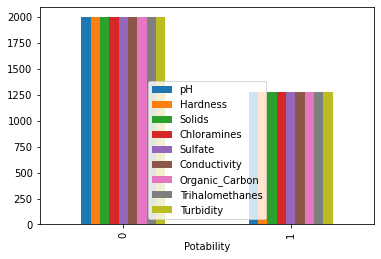

In [6]:
class_balance = data.groupby('Potability').count()
class_balance.plot(kind='bar')

Based on the counts for each class label, there are a significant number more non-potable records than potable records. To address this issue, we will use SMOTE to create more potable records (this is implemented in the Pipeline for the models).

Next, we should check the columns for any outliers. We will focus primarily on pH, Sulfate, and Trihalomethanes; however, there should also be a correlation between Hardness and Solids based off their definitions.

In [7]:
# Distribution statistics
data.iloc[:, :-1].describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_Carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

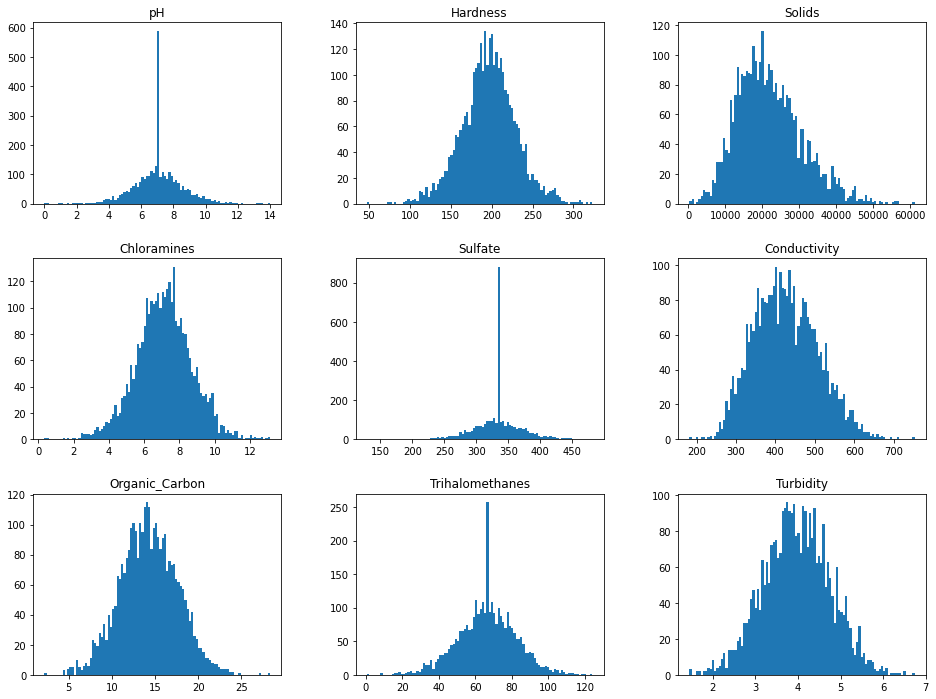

In [8]:
# Look at distribution of each feature
data.iloc[:, :-1].hist(grid=False, bins=100, figsize=(16, 12))

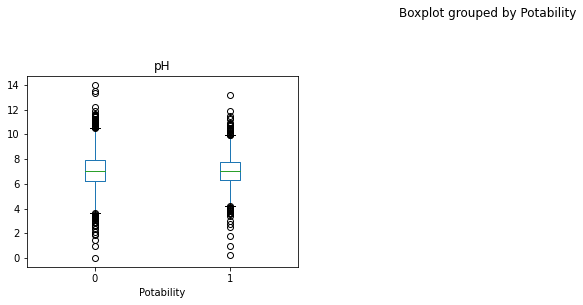

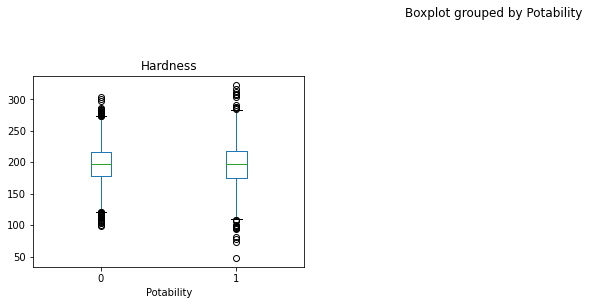

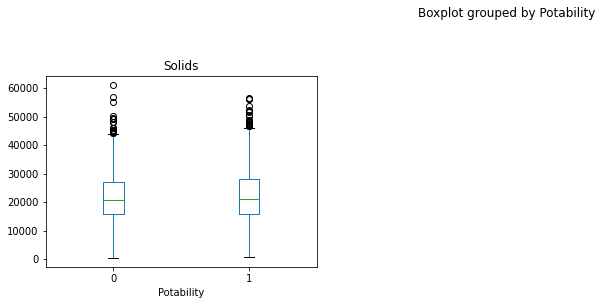

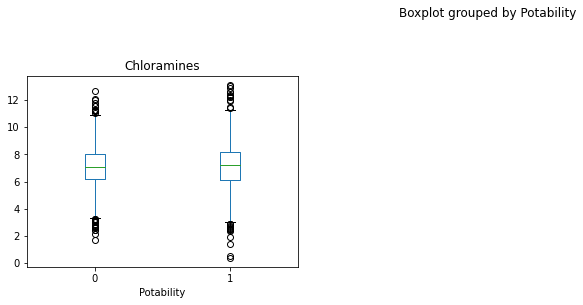

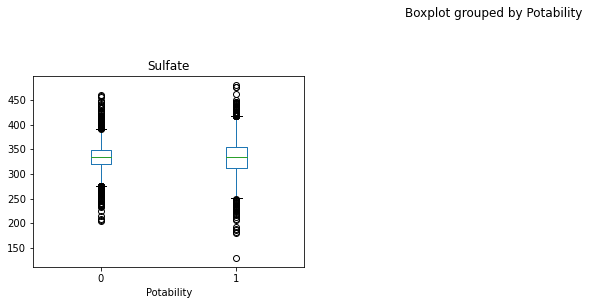

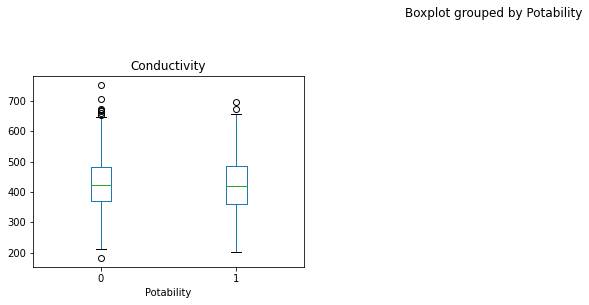

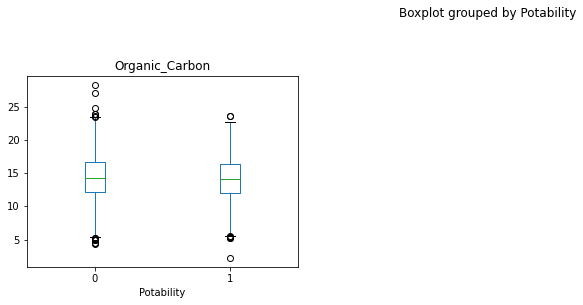

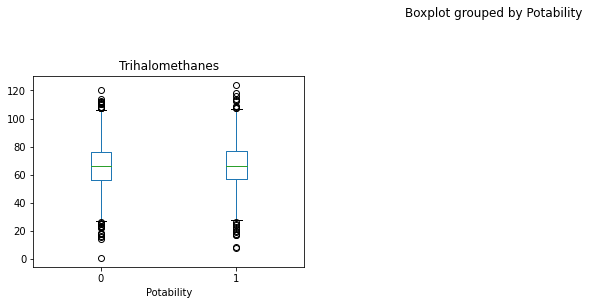

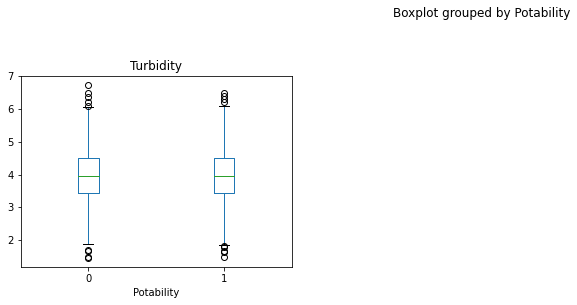

In [9]:
for feature in data.iloc[:,:-1]:
    data.boxplot(by='Potability', column=[feature], grid=False, figsize=(16,12), layout=(3,3))

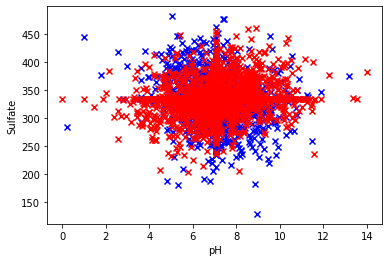

In [10]:
# Look at relationship between ph and Sulfate
potable_water = data[data['Potability'] == 1]
non_potable_water = data[data['Potability'] == 0]

plt.scatter(potable_water['pH'], potable_water['Sulfate'], c='blue', marker='x')
plt.scatter(non_potable_water['pH'], non_potable_water['Sulfate'], c='red', marker='x')

plt.xlabel('pH')
plt.ylabel('Sulfate')
plt.show()

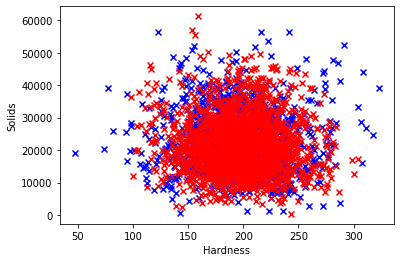

In [11]:
# Clean plt and plot Hardness and Solids
plt.clf()

plt.scatter(potable_water['Hardness'], potable_water['Solids'], c='blue', marker='x')
plt.scatter(non_potable_water['Hardness'], non_potable_water['Solids'], c='red', marker='x')

plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

Based off the histograms, the data appears to be well balanced with normal distributions, however there does appear to be some outliers in the data from a univariate perspective. The scatter plot did not reveal a correlation between pH/Sulfate and Hardness/Solids, which indicates the attributes are independent of each other. Nevertheless we will use an Isolation Forest to remove any outliers at a multivariate scale.

In [12]:
from sklearn.ensemble import IsolationForest

#Predict outliers using Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(data)

data['anomoly'] = model.predict(data)

In [13]:
print("Size before outlier removal =", len(data))

#Remove anomolies
data.drop(data.index[data['anomoly'] == -1], inplace=True)
data.drop(['anomoly'], axis=1, inplace=True)


print("Size before outlier removal =", len(data))
data.head()

Size before outlier removal = 3276
Size before outlier removal = 3112


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Feature Engineering

Since several of our feature's have been provided recommended levels by the WHO,
we can bin these these features by whether they do fall in WHO recommended
levels or not. We can also one hot encode our pH values to indicate whether
the water sample is in the following pH categories acid, neutral, or base.

In [14]:
print("Original Features:\n", data.head())

# One hot encoding pH levels into acid, neutral, and base

# acid = 0-7 pH
data['acid'] = [1 if x >= 0 and x < 7 else 0 for x in data['pH']]

# neutral = 7-8 pH
data['neutral'] = [1 if x >= 7 and x < 8 else 0 for x in data['pH']]

# base = 8-14 pH
data['base'] = [1 if x >= 8 and x <= 14 else 0 for x in data['pH']]

# Binning variables based off of recommend WHO levels, 1 for values
# within WHO recommended levels and 0 for values outside.

# Indicates if a pH value is within WHO recommended levels (6.5 - 8.5).
data['WHOpH'] = [1 if x >= 6.5 and x < 8.5 else 0 for x in data['pH']]

# Indicates if a chlorine value for chloramines is within WHO recommended levels (< 4).
data['WHOchloramines'] = [1 if x < 4 else 0 for x in data['Chloramines']]

# Indicates if a EC value for conductivity is within WHO recommended levels (< 400).
data['WHOconductivity'] = [1 if x < 400 else 0 for x in data['Conductivity']]

# Indicates if a THM value for trihalomethanes is within WHO recommended levels (< 80).
data['WHOtrihalomethanes'] = [1 if x < 80 else 0 for x in data['Trihalomethanes']]

# Indicates if a turbidity value is within WHO recommended levels (< 5).
data['WHOturbidity'] = [1 if x < 5 else 0 for x in data['Turbidity']]

print("Added Engineered Features:\n", data.head())

Original Features:
          pH    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_Carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Added Engineered Features:
          pH    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.

# Training a Model

Because the data appears to be evenly distributed and no correlation clearly exists between an attribute and its label, nor between two attributes, there must be relationships in higher dimensions. 

## Order of Training

We will begin by training a *KNN Classifier* because it takes every dimension into account. 

Then, we will train a *Decision Tree Classifier* because it allows us to better trace which features are important,
and it is not negatively affected by redundent or irrelevant features.

Then, we will train a *Naive Bayes Classifier* because Potable Water may be more likely to occur with certain values.

Then, we will train a *Neural Net Classifier* to find unobvious patterns in the data.

Then, we will train an *ADABoost Classifier* to focus on the hard-to-classify records.

Finally, we will train a *Random Forest Classifier* to avoid overfitting and maximize accuracy.

In [15]:
# Training Setup

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Separate labels from features
labels = data['Potability']
features = data.loc[:, data.columns != 'Potability']

# Scales all features
scaler = StandardScaler(with_mean=False, with_std=False)

# Reduce dimensionality
pca = PCA()

## KNN Classifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)

# We want to tune the number of neighbors 
param_grid = {
    'knn__n_neighbors': list(range(1, 51))
}

# Create an imbpipeline to address class imbalance, scale, and reduce dimension
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['scalar', scaler], ['pca', pca], ['knn', knn]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 5-fold nested cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=5)

# Get accuracy
print('Accuracy:', nested_score.mean())

Accuracy: 0.5751849003628331


# Decision Tree Classifier

In [17]:
dtc = DecisionTreeClassifier()

param_grid = {
    "dtc__max_depth" : [5,10,15,20],
    "dtc__min_samples_leaf" : [5,10,15,20],
    "dtc__max_features" : [5,10,15]
}

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['dtc', dtc]])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

nested_score = cross_val_score(grid_search, features, labels, cv=10)

print("Accuracy:", nested_score.mean())

Accuracy: 0.6131059856542171


## Naive Bayes Classifier

In [18]:
# Create the classifier
nb = GaussianNB()

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['nb', nb]])

# Run 10-fold cross validation
scores = cross_val_score(pipeline, features, labels, cv=10)

print('Accuracy:', scores.mean())

Accuracy: 0.5006441174045675


## Neural Net Classifier

In [19]:
# Initialize NN
mlp = MLPClassifier()

# We want to tune the number of layers and 
# activation function
param_grid = {
    'mlp__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# Create an imbpipeline to address class imbalance and scale
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['scalar', scaler], ['mlp', mlp]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 3-fold nested cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=3)

print('Accuracy:', nested_score.mean())

Accuracy: 0.4502142624003706


## ADABoost Classifier

In [20]:
# We want to tune the number of estimators
param_grid = {
    'ada__n_estimators': [50, 100, 150, 200]
}

# Initialize ADA Boost Classifier
ada = AdaBoostClassifier(n_estimators=150)

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['ada', ada]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 5-fold cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=5)

print("Accuracy:", nested_score.mean())

Accuracy: 0.5767972624940001


# Random Forests Classifier

In [21]:
rfc = RandomForestClassifier()

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['rfc', rfc]])

nested_score = cross_val_score(pipeline, features, labels, cv=5) 
                                         
print("Accuracy:", nested_score.mean())

Accuracy: 0.6134403080210371


# The Final Model

Based on the results of testing a few different models, a *Random Forest Classifier* would work best to classify this dataset.

Surprisingly, there is little correlation between different attributes and between the attribrutes and the labels.

<AxesSubplot:>

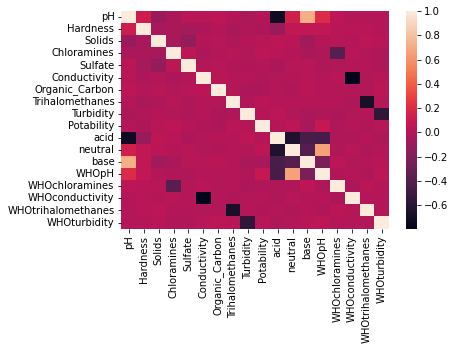

In [22]:
### Adapted from https://stackoverflow.com/questions/39409866/correlation-heatmap ###
import seaborn as sns

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [23]:
# your code goes here
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

features = data.loc[:, data.columns != 'Potability']
labels = data.loc[:, data.columns == 'Potability'].values.ravel()

# Get predictions
predictions = cross_val_predict(rfc, features, labels, cv=10)

# Create confusion matrix
print(confusion_matrix(labels, predictions))

# Create report
report = classification_report(labels, predictions)
print(report)

[[1683  259]
 [ 858  312]]
              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1942
           1       0.55      0.27      0.36      1170

    accuracy                           0.64      3112
   macro avg       0.60      0.57      0.55      3112
weighted avg       0.62      0.64      0.60      3112



## Conclusion

For setting up the problem, we performed various methods such as prepping the data (checking for outliers/missing values/errors), checking for class imbalances, and feature engineering to bin features. 
One interesting trend we found was that there was a much higher number of records for non-potable compared to potable. To address this problem, we used SMOTE to create more potable record to balance the classes.
Our analysis was satisfactory as we found that the dataset was of sufficient quality for analysis while our methods allowed us to fix issues such as missing columns and data through data imputing as well as the previously mentioned issue of class imbalance. 

For our classifiers, we used KNN, Decision Tree, Naive Bayes, NN, ADABoost, and Random Forest classifiers as the various classifiers had various advantages that we believed would boost accuracy. For example, we used the Random Forest classifier to avoid overfitting; we also used the Decision Tree classifier to see which features were significant. Based on the results for training the various models, we elected to use a Random Forest classifier as it had the highest percentage and best metrics: it had a precision of 0.65 and an f1-score of 0.75.

Most of the classifiers yielded decent accuracy percentages ranging from the high 50’s to low 60’s. 
One belief we have as to why the accuracy is not higher is that there are so many factors that go into determining if a sample is potable vs. non-potable. Even a small change in one of these factors can drastically change the results; this can be seen in our graphs and heatmap, which show that the attributes and labels have very little correlation.